In [1]:
!pip install pandas matplotlib seaborn wordcloud openpyxl


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# === Load Data ===
file_path = "/content/drive/MyDrive/keepup project methodology code/Final dataset.xlsx"
xls = pd.ExcelFile(file_path)
events_df = xls.parse("Events")
posts_df = xls.parse("post features")
comments_df = xls.parse("comments")
users_df = xls.parse("user features")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# === Clean Unnamed Columns ===
events_df = events_df.loc[:, ~events_df.columns.str.contains('^Unnamed')]

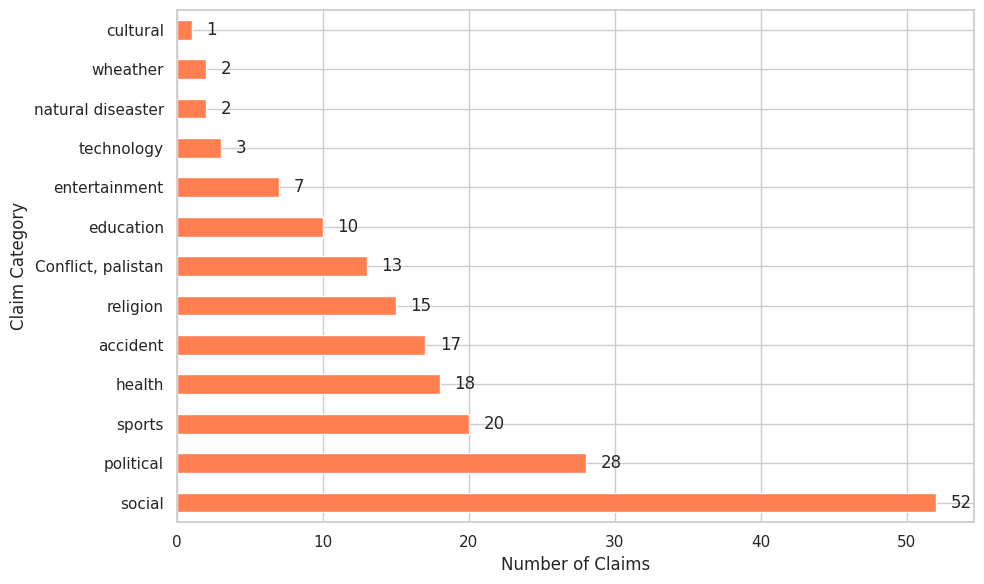

In [5]:
import matplotlib.pyplot as plt

# Value counts
claim_counts = events_df["claim-category"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = claim_counts.plot(kind="barh", color="coral")

# Add count labels next to each bar
for index, value in enumerate(claim_counts):
    plt.text(value + 1, index, str(value), va='center')

# Titles and labels (customize as needed)
plt.title("")
plt.xlabel("Number of Claims")
plt.ylabel("Claim Category")
plt.tight_layout()
plt.show()
#claim catagory distribution

In [15]:
# ------------------------------
# 5. WORD CLOUDS
# ------------------------------
def generate_wordcloud(text, title, colormap="viridis"):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()

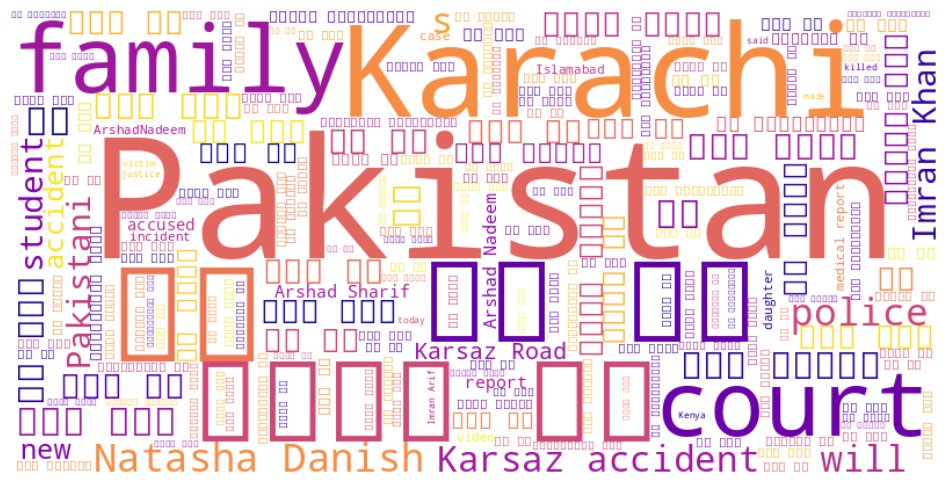

In [16]:
# Word cloud for post titles
post_text = ' '.join(posts_df["post-title"].dropna().astype(str).values)
generate_wordcloud(post_text, "", colormap="plasma")

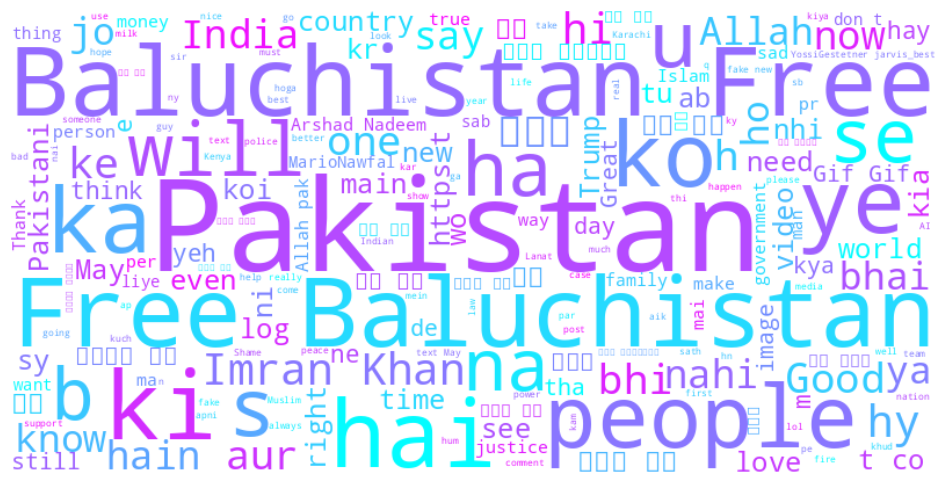

In [18]:
# Word cloud for comments
comment_text = ' '.join(comments_df["commenttext"].dropna().astype(str).values)
generate_wordcloud(comment_text, "", colormap="cool")

In [ ]:
# Normalize comment labels
comments_df["comment label"] = comments_df["comment label"].astype(str).str.strip().str.lower()


In [ ]:
# ============================
# 1. POST COUNT ANALYSIS
# ============================
print("----- POST ANALYSIS -----")
# Normalize post label
if "post-label" in posts_df.columns:
    posts_df["post-label"] = posts_df["post-label"].astype(str).str.strip().str.lower()

    total_posts = len(posts_df)
    true_posts = (posts_df["post-label"] == "0").sum()
    false_posts = (posts_df["post-label"] == "1").sum()

    print(f"Total posts: {total_posts}")
    print(f"True posts: {true_posts}")
    print(f"False posts: {false_posts}")
else:
    print("Column 'post label' not found in posts sheet.")


----- POST ANALYSIS -----
Total posts: 1024
True posts: 487
False posts: 537


/tmp/ipython-input-48-1355281627.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_counts.index, y=post_counts.values, palette="coolwarm")


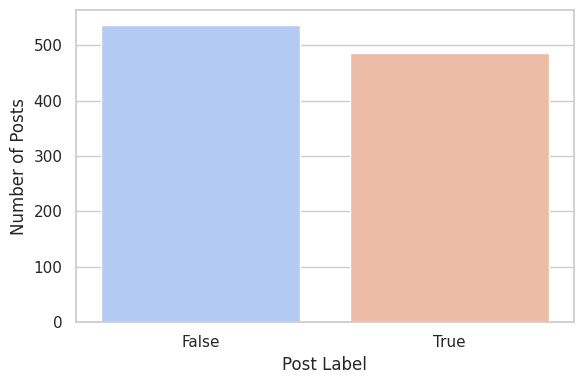

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count post labels
post_counts = posts_df["post-label"].value_counts().rename(index={"0": "True", "1": "False"})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=post_counts.index, y=post_counts.values, palette="coolwarm")
plt.title("")
plt.xlabel("Post Label")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()
#distribution of post labels

In [12]:
# ============================
# 2. COMMENT COUNT ANALYSIS
# ============================
print("\n----- COMMENT ANALYSIS -----")
# Normalize comment label
comments_df["comment label"] = comments_df["comment label"].astype(str).str.strip().str.lower()

total_comments = len(comments_df)
agree_comments = (comments_df["comment label"] == "agree").sum()
disagree_comments = (comments_df["comment label"] == "disagree").sum()
query_comments = (comments_df["comment label"] == "query").sum()
comment_comments = (comments_df["comment label"] == "comment").sum()

print(f"Total comments: {total_comments}")
print(f"Agree: {agree_comments}")
print(f"Disagree: {disagree_comments}")
print(f"Query: {query_comments}")
print(f"Comment: {comment_comments}")


----- COMMENT ANALYSIS -----
Total comments: 69529
Agree: 22727
Disagree: 9030
Query: 5859
Comment: 31913


/tmp/ipython-input-13-2614891994.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comment_counts.index, y=comment_counts.values, palette="pastel")


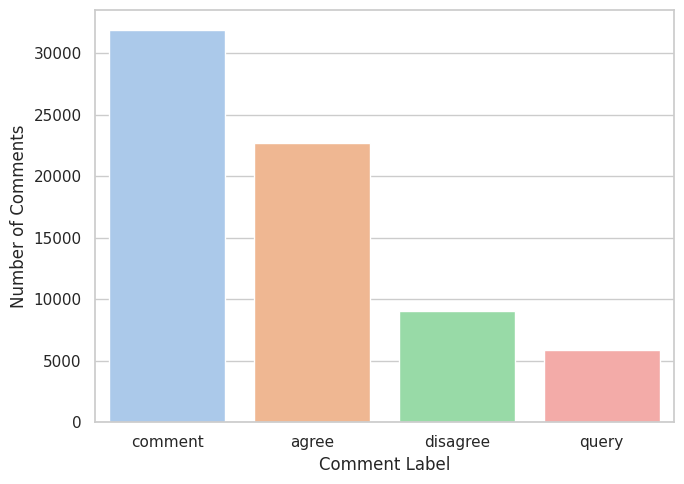

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each label
comment_counts = comments_df["comment label"].value_counts()

# Bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=comment_counts.index, y=comment_counts.values, palette="pastel")
plt.title("")
plt.xlabel("Comment Label")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


In [ ]:
# ============================
# 3. CLAIM ANALYSIS
# ============================
print("\n----- CLAIM LABEL ANALYSIS -----")
# Normalize event labels
events_df["label"] = events_df["label"].astype(str).str.strip().str.lower()

total_claims = len(events_df)
true_claims = (events_df["label"] == "1").sum()
false_claims = (events_df["label"] == "0").sum()

print(f"Total claims: {total_claims}")
print(f"True claims: {true_claims}")
print(f"False claims: {false_claims}")


----- CLAIM LABEL ANALYSIS -----
Total claims: 188
True claims: 148
False claims: 40


/tmp/ipython-input-40-2112246856.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_counts.index, y=claim_counts.values, palette="Set2")


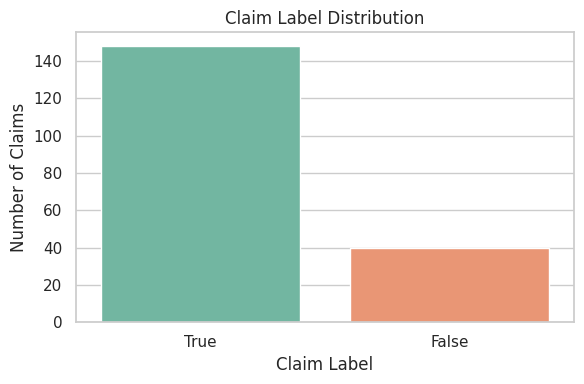

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
claim_counts = events_df["label"].value_counts().rename({"1": "True", "0": "False"})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=claim_counts.index, y=claim_counts.values, palette="Set2")
plt.title("Claim Label Distribution")
plt.xlabel("Claim Label")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()


In [7]:
# ============================
# 4. TITLE LENGTH ANALYSIS
# ============================
print("\n----- POST TITLE LENGTH ANALYSIS -----")

posts_df["post-title"] = posts_df["post-title"].astype(str)
posts_df["title_length"] = posts_df["post-title"].apply(len)
posts_df["title_tokens"] = posts_df["post-title"].apply(lambda x: len(x.split()))

min_length = posts_df["title_length"].min()
max_length = posts_df["title_length"].max()

min_tokens = posts_df["title_tokens"].min()
max_tokens = posts_df["title_tokens"].max()

print(f"Min title length (chars): {min_length}")
print(f"Max title length (chars): {max_length}")
print(f"Min title length (tokens): {min_tokens}")
print(f"Max title length (tokens): {max_tokens}")



----- POST TITLE LENGTH ANALYSIS -----
Min title length (chars): 10
Max title length (chars): 2145
Min title length (tokens): 1
Max title length (tokens): 462


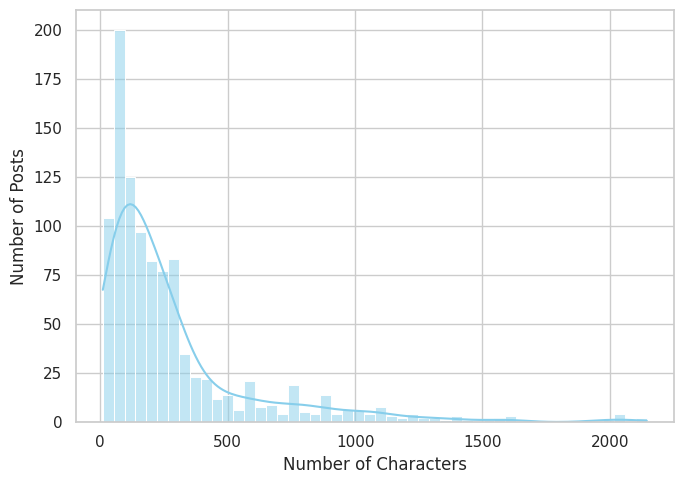

In [8]:
plt.figure(figsize=(7, 5))
sns.histplot(posts_df["title_length"], bins=50, kde=True, color="skyblue")
plt.title("")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


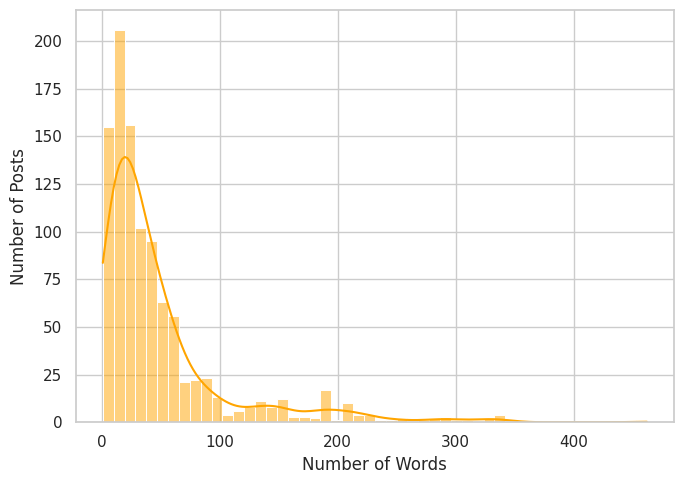

In [10]:
plt.figure(figsize=(7, 5))
sns.histplot(posts_df["title_tokens"], bins=50, kde=True, color="orange")
plt.title("")
plt.xlabel("Number of Words")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


In [20]:
# ============================
# 4. comment LENGTH ANALYSIS
# ============================
print("\n----- POST comment LENGTH ANALYSIS -----")

comments_df["commenttext"] = comments_df["commenttext"].astype(str)
comments_df["comment_length"] = comments_df["commenttext"].apply(len)
comments_df["comment_tokens"] = comments_df["commenttext"].apply(lambda x: len(x.split()))

min_length = comments_df["comment_length"].min()
max_length = comments_df["comment_length"].max()

min_tokens = comments_df["comment_tokens"].min()
max_tokens = comments_df["comment_tokens"].max()

print(f"Min comment length (chars): {min_length}")
print(f"Max comment length (chars): {max_length}")
print(f"Min comment length (tokens): {min_tokens}")
print(f"Max comment length (tokens): {max_tokens}")



----- POST comment LENGTH ANALYSIS -----
Min comment length (chars): 1
Max comment length (chars): 4422
Min comment length (tokens): 1
Max comment length (tokens): 976


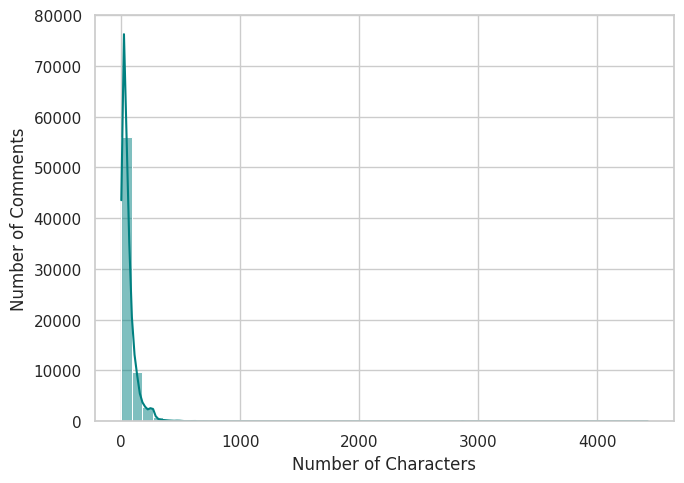

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.histplot(comments_df["comment_length"], bins=50, kde=True, color="teal")
plt.title("")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


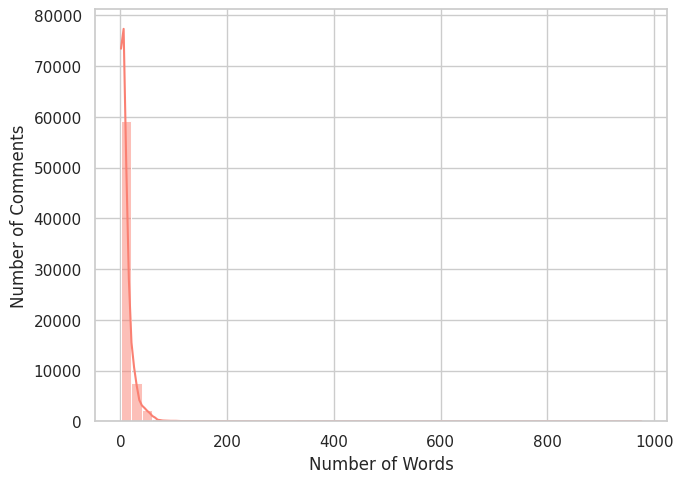

In [22]:
plt.figure(figsize=(7, 5))
sns.histplot(comments_df["comment_tokens"], bins=50, kde=True, color="salmon")
plt.title("")
plt.xlabel("Number of Words")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()
